<a href="https://colab.research.google.com/github/Y-Srivaishnavi/uci-civil-cs-predict/blob/main/UCI_CS_Civil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel('/content/Concrete_Data.xls',
                   names=['Cement', 'Blast Furnace Slag',
                          'Fly Ash', 'Water', 'Superplasticizer',
                          'Coarse Aggregate', 'Fine Aggregate',
                          'Age', 'Compressive Strength'])
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# EDA

In [4]:
def show_basics(data):
    a = pd.DataFrame()
    a['Missing Value'] = df.isnull().sum()
    a['No. of unique Value'] = df.nunique()
    a['dtype'] = df.dtypes
    return a
show_basics(df)

,Missing Value,No. of unique Value,dtype
Cement,0,280,float64
Blast Furnace Slag,0,187,float64
Fly Ash,0,163,float64
Water,0,205,float64
Superplasticizer,0,155,float64
Coarse Aggregate,0,284,float64
Fine Aggregate,0,304,float64
Age,0,14,int64
Compressive Strength,0,938,float64


Dataset is clean, mostly continuous, and with consistent data types.

In [3]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Dataset has varied ranges within its columns. It can benefit with scaling.

In [5]:
cols = df.columns

## Boxplot

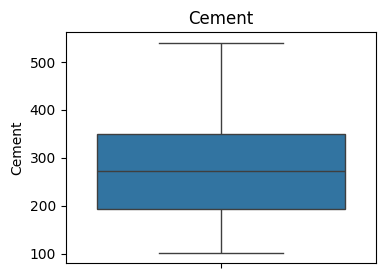

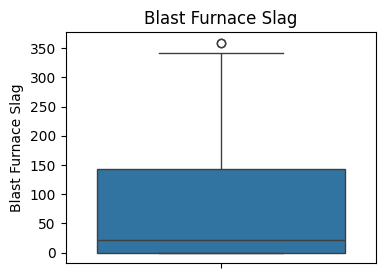

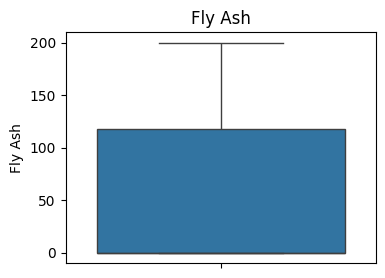

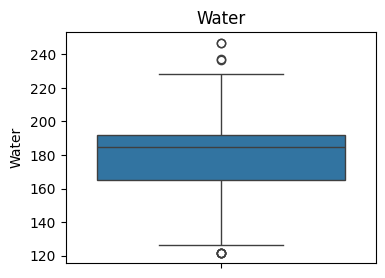

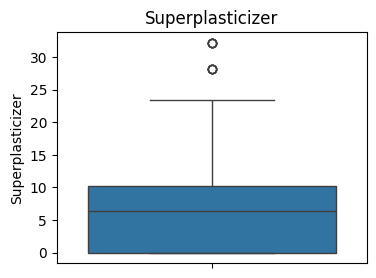

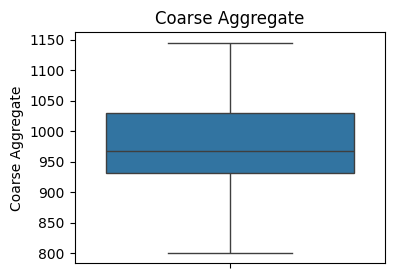

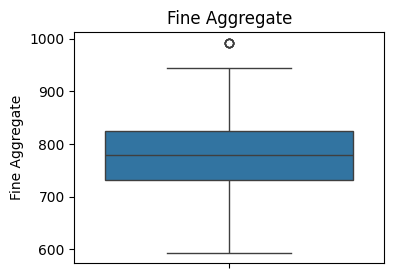

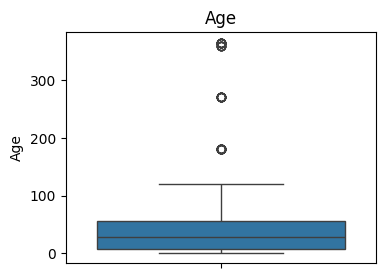

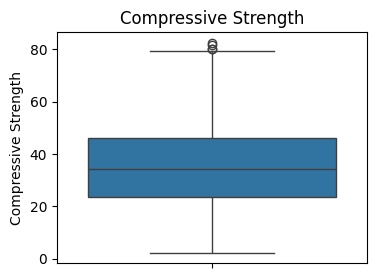

In [8]:
for col in cols:
  plt.figure(figsize=(4,3))
  sns.boxplot(df[col])
  plt.title(f"{col}")
  plt.show()

Age column is highly skewed. Every other column seems fairly normal.

## Distribution Curves

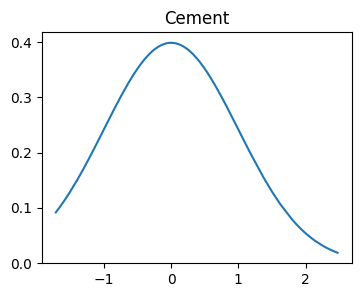

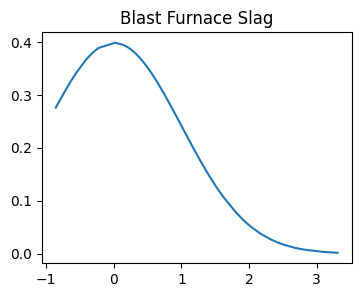

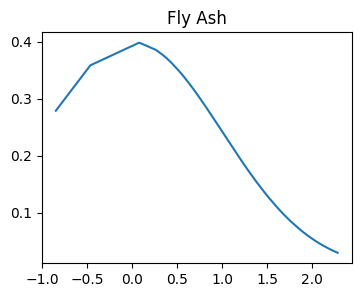

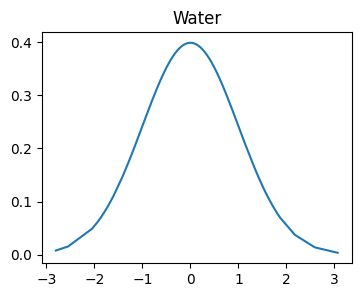

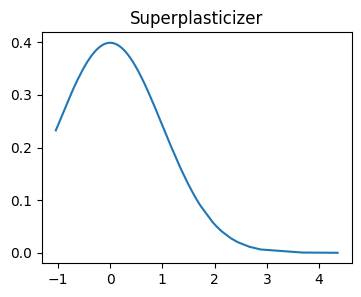

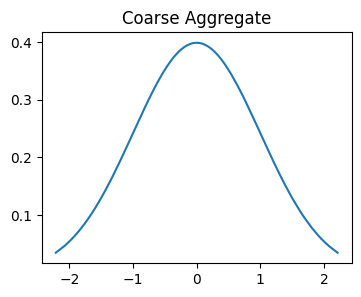

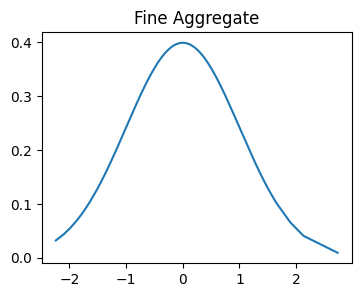

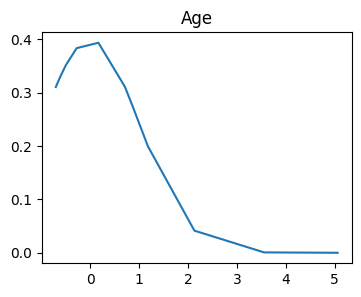

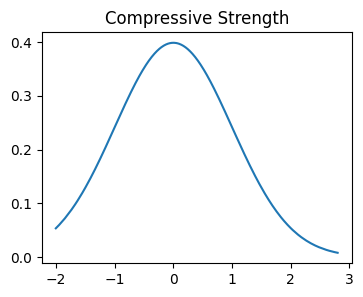

In [11]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import statistics

scaler = StandardScaler()

for col in cols:
  plt.figure(figsize=(4,3))
  x_axis = scaler.fit_transform(df[col].sort_values().values.reshape(-1, 1))
  mean = x_axis.mean()
  sd = x_axis.std()
  plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
  plt.title(col)
  plt.show()

Data of `Blast Furnace Slag`, `Fly Ash`, `Superplasticizer`, and `Age` is heavily skewed to the right. All other features are left skewed.

## Correlations

<Axes: >

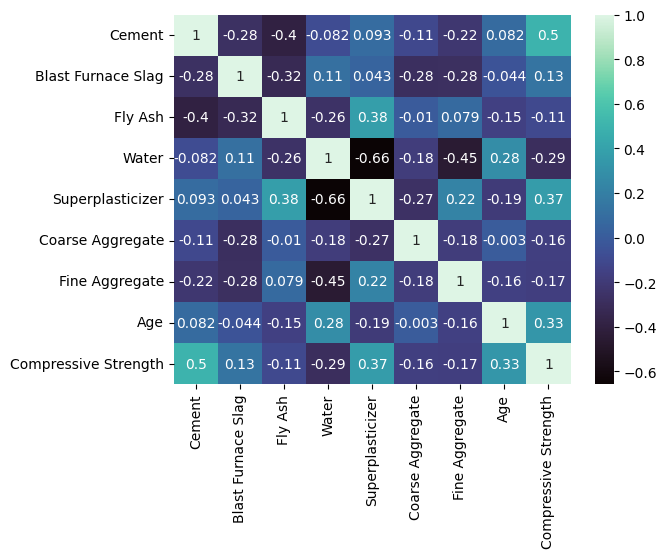

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="mako")

The target variable `Compressive Strength` is highly correlated with `Cement`, `Age`, and `Superplasticizer`. It is inversely correlated with `Water` content. Verifying these correlations with scatter plots.

## Scatter Plots

<Figure size 400x300 with 0 Axes>

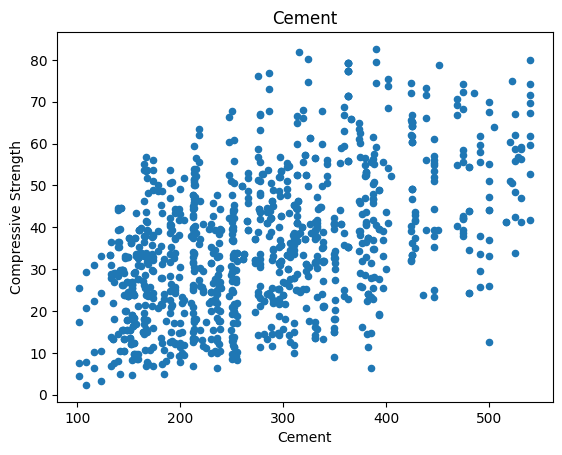

<Figure size 400x300 with 0 Axes>

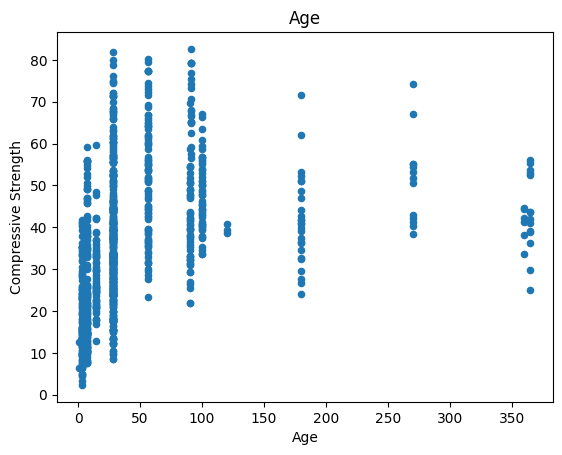

<Figure size 400x300 with 0 Axes>

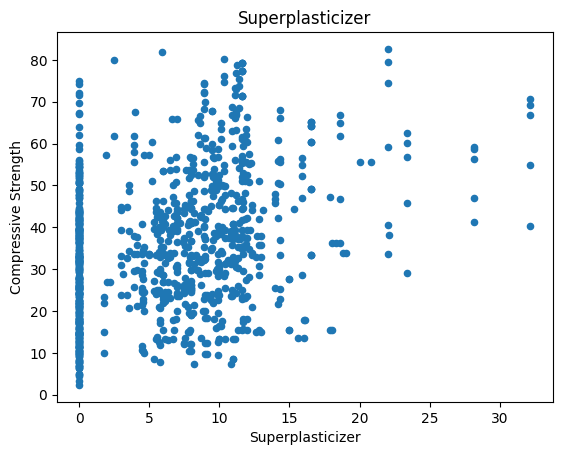

<Figure size 400x300 with 0 Axes>

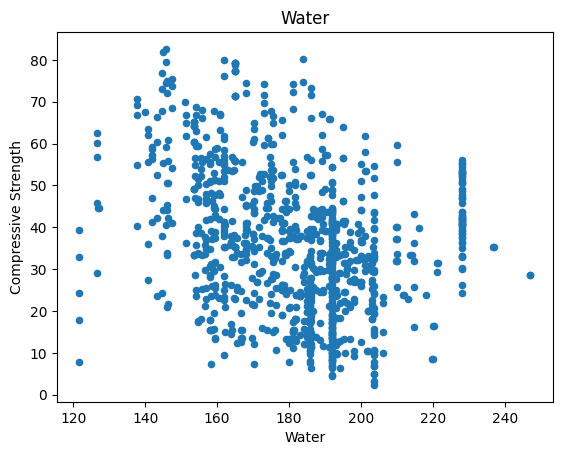

In [22]:
corr_feat = ["Cement", "Age", "Superplasticizer", "Water"]

for feat in corr_feat:
  plt.figure(figsize=(4,3))
  df.sort_values('Compressive Strength').loc[:, [f'{feat}','Compressive Strength']].plot.scatter(x=f'{feat}', y='Compressive Strength')
  plt.title(feat)
  plt.show()


`Cement` correlation is more apparent than other variables.

# Model Training

In [23]:
X_df = df.drop('Compressive Strength', axis=1)
y_df = df["Compressive Strength"]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits=5, random_state=21, shuffle=True)
model = RandomForestRegressor()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)

In [39]:
scores

array([0.87205709, 0.91873031, 0.86213245, 0.89617513, 0.92103641])

Training scores look acceptable. Check testing scores.

In [40]:
model.score(X_test, y_test)

0.8758828397827434

No overfitting as test scores are nearer to training scores.

**Conclusion**: Random Forest Regressor is a fairly good model for the UCI Irvine Compressive Strength Dataset. Can be improved further for 90+ score trying with LightGBM.